In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# take in how many trials they ran as standard input REMEMBER TO DO THIS

In [2]:
num_trials = int(input("How many trials did you run? "))

How many trials did you run? 10


In [3]:
def parse_output(filename):
    
    avg_delays = []
    avg_bitrates = []
    
    output_file = open(filename)
    
    for line in output_file:

        if "Average delay" in line:
            data = line.split()
            avg_delays.append(float(data[3]))
        elif "Average bitrate" in line:
            data = line.split()
            bitrate = float(data[3])
            if data[4] == 'Kbit/s':
                avg_bitrates.append(bitrate * 1e3)
            elif data[4] == 'Mbit/s':
                avg_bitrates.append(bitrate * 1e6)
            else:
                print("Error in bitrate units\n")
        else:
            continue
        
    return avg_delays, avg_bitrates

In [4]:
qdiscs = ['noqueue','codel','red','fq_codel','pie']
transports = ['tcp','udp']
high_bandwidths = [1.0, 2.5, 5.0, 10.0]
#num_trials = 10

actual_output_files = []

# Be careful of not splitting data into 4ths correctly b/c of order of filenames
for bandwidth in high_bandwidths:
    for qdisc in qdiscs:
        for transport in transports:
            for i in range(1,num_trials+1):
                filename = './server_outputs/'
                filename += qdisc + "-" + transport + "-" + str(bandwidth) + "-" + str(i) + ".output"
                actual_output_files.append(filename)
                
#print(actual_output_files)

In [5]:
#test_file = open('./server_outputs/noqueue-tcp-1.0-1.output',"r")
#for line in test_file:
#    print(line)

In [7]:
def parse_output_file(filename):
    
    avg_delays = []
    avg_bitrates = []
    
    output_file = open(filename)
    
    for line in output_file:
        
        if "Average delay" in line:
            data = line.split()
            avg_delays.append(float(data[3]))
        elif "Average bitrate" in line:
            data = line.split()
            bitrate = float(data[3])
            if data[4] == 'Kbit/s':
                avg_bitrates.append(bitrate * 1e3)
            elif data[4] == 'Mbit/s':
                avg_bitrates.append(bitrate * 1e6)
            else:
                print("Error in bitrate units\n")
        else:
            continue
    
    return avg_delays, avg_bitrates

In [18]:
all_delay_data_noqueue_tcp = []
all_delay_data_noqueue_udp = []
all_delay_data_codel_tcp = []
all_delay_data_codel_udp = []
all_delay_data_red_tcp = []
all_delay_data_red_udp = []
all_delay_data_fq_codel_tcp = []
all_delay_data_fq_codel_udp = []
all_delay_data_pie_tcp = []
all_delay_data_pie_udp = []
all_bitrate_data_noqueue_tcp = []
all_bitrate_data_noqueue_udp = []
all_bitrate_data_codel_tcp = []
all_bitrate_data_codel_udp = []
all_bitrate_data_red_tcp = []
all_bitrate_data_red_udp = []
all_bitrate_data_fq_codel_tcp = []
all_bitrate_data_fq_codel_udp = []
all_bitrate_data_pie_tcp = []
all_bitrate_data_pie_udp = []

for f in actual_output_files:
    
    delays, bitrates = parse_output(f)
    total_avg_delay = delays[3]
    total_avg_bitrate = bitrates[3]
    
    if "noqueue" in f:
        if "tcp" in f:
            all_delay_data_noqueue_tcp.append(total_avg_delay)
            all_bitrate_data_noqueue_tcp.append(total_avg_bitrate)
        elif "udp" in f:
            all_delay_data_noqueue_udp.append(total_avg_delay)
            all_bitrate_data_noqueue_udp.append(total_avg_bitrate)
    elif "fq_codel" in f:
        if "tcp" in f:
            all_delay_data_fq_codel_tcp.append(total_avg_delay)
            all_bitrate_data_fq_codel_tcp.append(total_avg_bitrate)
        elif "udp" in f:
            all_delay_data_fq_codel_udp.append(total_avg_delay)
            all_bitrate_data_fq_codel_udp.append(total_avg_bitrate)
    elif "red" in f:
        if "tcp" in f:
            all_delay_data_red_tcp.append(total_avg_delay)
            all_bitrate_data_red_tcp.append(total_avg_bitrate)
        elif "udp" in f:
            all_delay_data_red_udp.append(total_avg_delay)
            all_bitrate_data_red_udp.append(total_avg_bitrate)
    elif "codel" in f:
        if "tcp" in f:
            all_delay_data_codel_tcp.append(total_avg_delay)
            all_bitrate_data_codel_tcp.append(total_avg_bitrate)
        elif "udp" in f:
            all_delay_data_codel_udp.append(total_avg_delay)
            all_bitrate_data_codel_udp.append(total_avg_bitrate)
    elif "pie" in f:
        if "tcp" in f:
            all_delay_data_pie_tcp.append(total_avg_delay)
            all_bitrate_data_pie_tcp.append(total_avg_bitrate)
        elif "udp" in f:
            all_delay_data_pie_udp.append(total_avg_delay)
            all_bitrate_data_pie_udp.append(total_avg_bitrate)
    else:
        print("Error: unknown qdisc in file name")


# Replace Bitrate with Link Utilization

In [42]:
# Split datasets up into quarters to place datapoints with respective bandwidths
# and convert bitrate to linkutil
bandwidths = [0.1, 0.25, 0.5, 1.0]
# Use these to split up data into four evenly-sized chunks for plots
num_datapts = num_trials * len(bandwidths)

# Split all datasets 
Q1_index = num_datapts//4
Q2_index = 2*num_datapts//4
Q3_index = 3*num_datapts//4

all_data = np.zeros((6,2), dtype=object)

all_linkutil_data_noqueue_tcp = []
all_linktuil_data_noqueue_udp = []
all_linkutil_data_codel_tcp = []
all_linkutil_data_codel_udp = []
all_linkutil_data_red_tcp = []
all_linktuil_data_red_udp = []
all_linkutil_data_fq_codel_tcp = []
all_linkutil_data_fq_codel_udp = []
all_linkutil_data_pie_tcp = []
all_linktuil_data_pie_udp = []

all_linkutil_data_noqueue_tcp = [val / (bandwidths[0]*1e6) * 100 for val in all_bitrate_data_noqueue_tcp[:Q1_index]]
all_linkutil_data_noqueue_tcp.extend([val / (bandwidths[1]*1e6) * 100 for val in all_bitrate_data_noqueue_tcp[Q1_index:Q2_index]])
all_linkutil_data_noqueue_tcp.extend([val / (bandwidths[2]*1e6) * 100 for val in all_bitrate_data_noqueue_tcp[Q2_index:Q3_index]])
all_linkutil_data_noqueue_tcp.extend([val / (bandwidths[3]*1e6) * 100 for val in all_bitrate_data_noqueue_tcp[Q3_index:]])

all_linkutil_data_noqueue_udp = [val / (bandwidths[0]*1e6) * 100 for val in all_bitrate_data_noqueue_udp[:Q1_index]]
all_linkutil_data_noqueue_udp.extend([val / (bandwidths[1]*1e6) * 100 for val in all_bitrate_data_noqueue_udp[Q1_index:Q2_index]])
all_linkutil_data_noqueue_udp.extend([val / (bandwidths[2]*1e6) * 100 for val in all_bitrate_data_noqueue_udp[Q2_index:Q3_index]])
all_linkutil_data_noqueue_udp.extend([val / (bandwidths[3]*1e6) * 100 for val in all_bitrate_data_noqueue_udp[Q3_index:]])

all_linkutil_data_codel_tcp = [val / (bandwidths[0]*1e6) * 100 for val in all_bitrate_data_codel_tcp[:Q1_index]]
all_linkutil_data_codel_tcp.extend([val / (bandwidths[1]*1e6) * 100 for val in all_bitrate_data_codel_tcp[Q1_index:Q2_index]])
all_linkutil_data_codel_tcp.extend([val / (bandwidths[2]*1e6) * 100 for val in all_bitrate_data_codel_tcp[Q2_index:Q3_index]])
all_linkutil_data_codel_tcp.extend([val / (bandwidths[3]*1e6) * 100 for val in all_bitrate_data_codel_tcp[Q3_index:]])

all_linkutil_data_codel_udp = [val / (bandwidths[0]*1e6) * 100 for val in all_bitrate_data_codel_udp[:Q1_index]]
all_linkutil_data_codel_udp.extend([val / (bandwidths[1]*1e6) * 100 for val in all_bitrate_data_codel_udp[Q1_index:Q2_index]])
all_linkutil_data_codel_udp.extend([val / (bandwidths[2]*1e6) * 100 for val in all_bitrate_data_codel_udp[Q2_index:Q3_index]])
all_linkutil_data_codel_udp.extend([val / (bandwidths[3]*1e6) * 100 for val in all_bitrate_data_codel_udp[Q3_index:]])

all_linkutil_data_red_tcp = [val / (bandwidths[0]*1e6) * 100 for val in all_bitrate_data_red_tcp[:Q1_index]]
all_linkutil_data_red_tcp.extend([val / (bandwidths[1]*1e6) * 100 for val in all_bitrate_data_red_tcp[Q1_index:Q2_index]])
all_linkutil_data_red_tcp.extend([val / (bandwidths[2]*1e6) * 100 for val in all_bitrate_data_red_tcp[Q2_index:Q3_index]])
all_linkutil_data_red_tcp.extend([val / (bandwidths[3]*1e6) * 100 for val in all_bitrate_data_red_tcp[Q3_index:]])

all_linkutil_data_red_udp = [val / (bandwidths[0]*1e6) * 100 for val in all_bitrate_data_red_udp[:Q1_index]]
all_linkutil_data_red_udp.extend([val / (bandwidths[1]*1e6) * 100 for val in all_bitrate_data_red_udp[Q1_index:Q2_index]])
all_linkutil_data_red_udp.extend([val / (bandwidths[2]*1e6) * 100 for val in all_bitrate_data_red_udp[Q2_index:Q3_index]])
all_linkutil_data_red_udp.extend([val / (bandwidths[3]*1e6) * 100 for val in all_bitrate_data_red_udp[Q3_index:]])

all_linkutil_data_fq_codel_tcp = [val / (bandwidths[0]*1e6) * 100 for val in all_bitrate_data_fq_codel_tcp[:Q1_index]]
all_linkutil_data_fq_codel_tcp.extend([val / (bandwidths[1]*1e6) * 100 for val in all_bitrate_data_fq_codel_tcp[Q1_index:Q2_index]])
all_linkutil_data_fq_codel_tcp.extend([val / (bandwidths[2]*1e6) * 100 for val in all_bitrate_data_fq_codel_tcp[Q2_index:Q3_index]])
all_linkutil_data_fq_codel_tcp.extend([val / (bandwidths[3]*1e6) * 100 for val in all_bitrate_data_fq_codel_tcp[Q3_index:]])

all_linkutil_data_fq_codel_udp = [val / (bandwidths[0]*1e6) * 100 for val in all_bitrate_data_fq_codel_udp[:Q1_index]]
all_linkutil_data_fq_codel_udp.extend([val / (bandwidths[1]*1e6) * 100 for val in all_bitrate_data_fq_codel_udp[Q1_index:Q2_index]])
all_linkutil_data_fq_codel_udp.extend([val / (bandwidths[2]*1e6) * 100 for val in all_bitrate_data_fq_codel_udp[Q2_index:Q3_index]])
all_linkutil_data_fq_codel_udp.extend([val / (bandwidths[3]*1e6) * 100 for val in all_bitrate_data_fq_codel_udp[Q3_index:]])

all_linkutil_data_pie_tcp = [val / (bandwidths[0]*1e6) * 100 for val in all_bitrate_data_pie_tcp[:Q1_index]]
all_linkutil_data_pie_tcp.extend([val / (bandwidths[1]*1e6) * 100 for val in all_bitrate_data_pie_tcp[Q1_index:Q2_index]])
all_linkutil_data_pie_tcp.extend([val / (bandwidths[2]*1e6) * 100 for val in all_bitrate_data_pie_tcp[Q2_index:Q3_index]])
all_linkutil_data_pie_tcp.extend([val / (bandwidths[3]*1e6) * 100 for val in all_bitrate_data_pie_tcp[Q3_index:]])

all_linkutil_data_pie_udp = [val / (bandwidths[0]*1e6) * 100 for val in all_bitrate_data_pie_udp[:Q1_index]]
all_linkutil_data_pie_udp.extend([val / (bandwidths[1]*1e6) * 100 for val in all_bitrate_data_pie_udp[Q1_index:Q2_index]])
all_linkutil_data_pie_udp.extend([val / (bandwidths[2]*1e6) * 100 for val in all_bitrate_data_pie_udp[Q2_index:Q3_index]])
all_linkutil_data_pie_udp.extend([val / (bandwidths[3]*1e6) * 100 for val in all_bitrate_data_pie_udp[Q3_index:]])

In [45]:
def split_data(noqueue_data, codel_data, red_data, fq_codel_data, pie_data):
    
    all_data = np.zeros((5), dtype=object)
    input_list = [noqueue_data, codel_data, red_data, fq_codel_data, pie_data]
    
    bandwidths = [0.1, 0.25, 0.5, 1.0]
    # Use these to split up data into four evenly-sized chunks for plots
    num_datapts = num_trials * len(bandwidths)

    # Split all datasets 
    Q1_index = num_datapts//4
    Q2_index = 2*num_datapts//4
    Q3_index = 3*num_datapts//4
    
    for i in range(len(input_list)):
        
        all_data[i] = [input_list[i][:Q1_index],
                             input_list[i][Q1_index:Q2_index],
                             input_list[i][Q2_index:Q3_index],
                             input_list[i][Q3_index:]]
        
    return all_data

In [46]:
qdisc_list = ['NoQueue','CoDel','RED','FQ_CoDel','PIE']
var_types = ['Delay (s)', 'Link Utilization (%)']
transport_types = ['TCP', 'UDP']
bandwidths = [0.1, 0.25, 0.5, 1.0]

# Function to plot data 
def plot_data(var_type, transport_type, data):
    
    fig, axs = plt.subplots(5,1, figsize=(10,20))
    fig.patch.set_facecolor('lightgreen')
    fig.patch.set_alpha(0.6)
    fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=1.1,
                        hspace=0.4, wspace=0.5)

    for row in range(5):

        plot = axs[row].boxplot(data[row], patch_artist=True)#, showfliers=False)

        title = var_type + " with " + qdisc_list[row] + " & " + transport_type
        axs[row].set_ylabel(var_type, fontsize=16, fontweight='bold')
        axs[row].set_title(title, fontsize=20, fontweight='bold')
        axs[row].set_xticklabels(bandwidths)
        axs[row].tick_params(direction="in", length=8)
        axs[row].set_xlabel('Bandwidth (Mbit/sec)', fontsize=16, fontweight='bold')

        for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            if item == 'medians':
                plt.setp(plot[item], color='white')
            else:
                plt.setp(plot[item], color='darkgreen')

In [47]:
# Get data for plotting

all_data_tcp_delay = split_data(all_delay_data_noqueue_tcp, all_delay_data_codel_tcp,
                                     all_delay_data_red_tcp, all_delay_data_fq_codel_tcp,
                                     all_delay_data_pie_tcp)

all_data_tcp_linkutil = split_data(all_linkutil_data_noqueue_tcp, all_linkutil_data_codel_tcp,
                                     all_linkutil_data_red_tcp, all_linkutil_data_fq_codel_tcp,
                                     all_linkutil_data_pie_tcp)


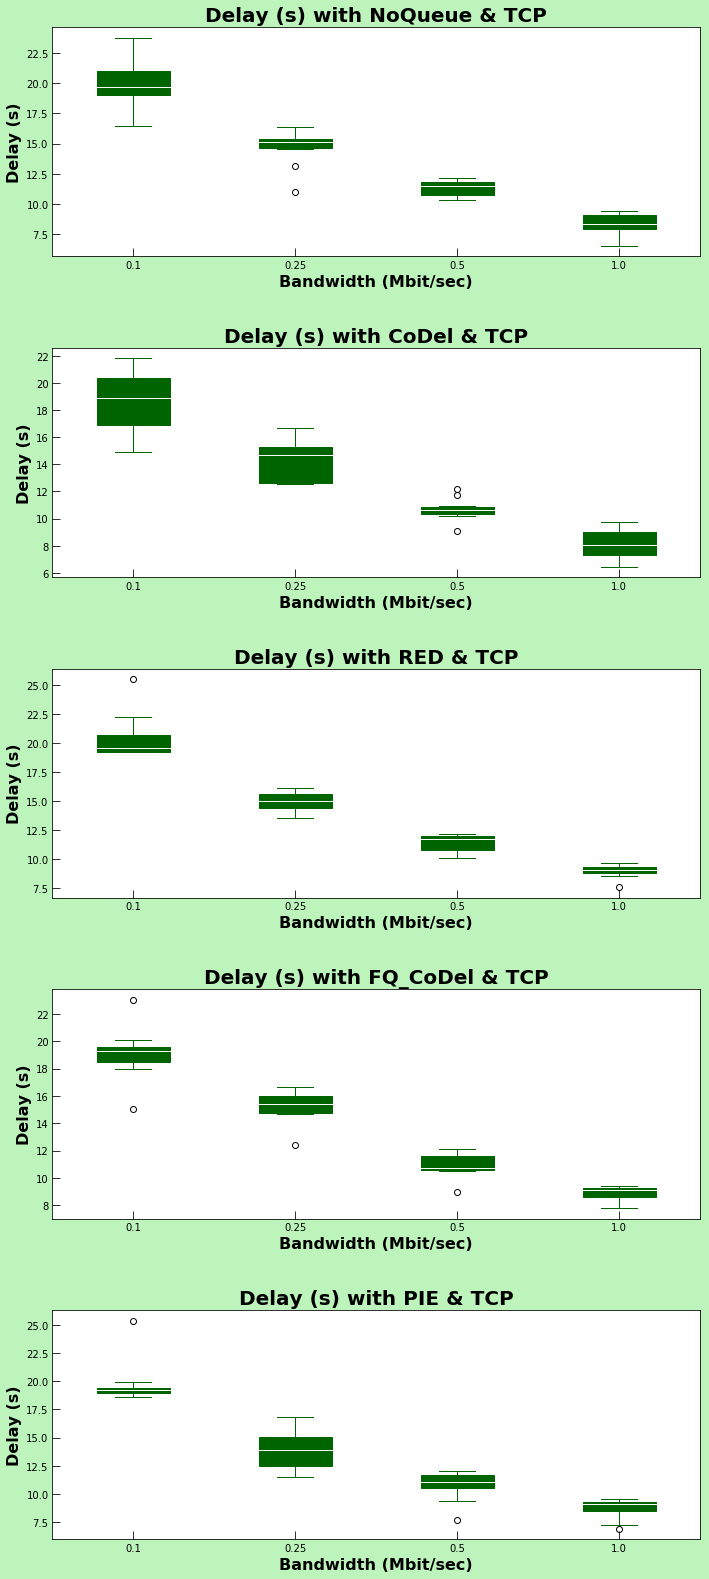

In [56]:
# Plot TCP-Delay data
plot_data(var_types[0], transport_types[0], all_data_tcp_delay)

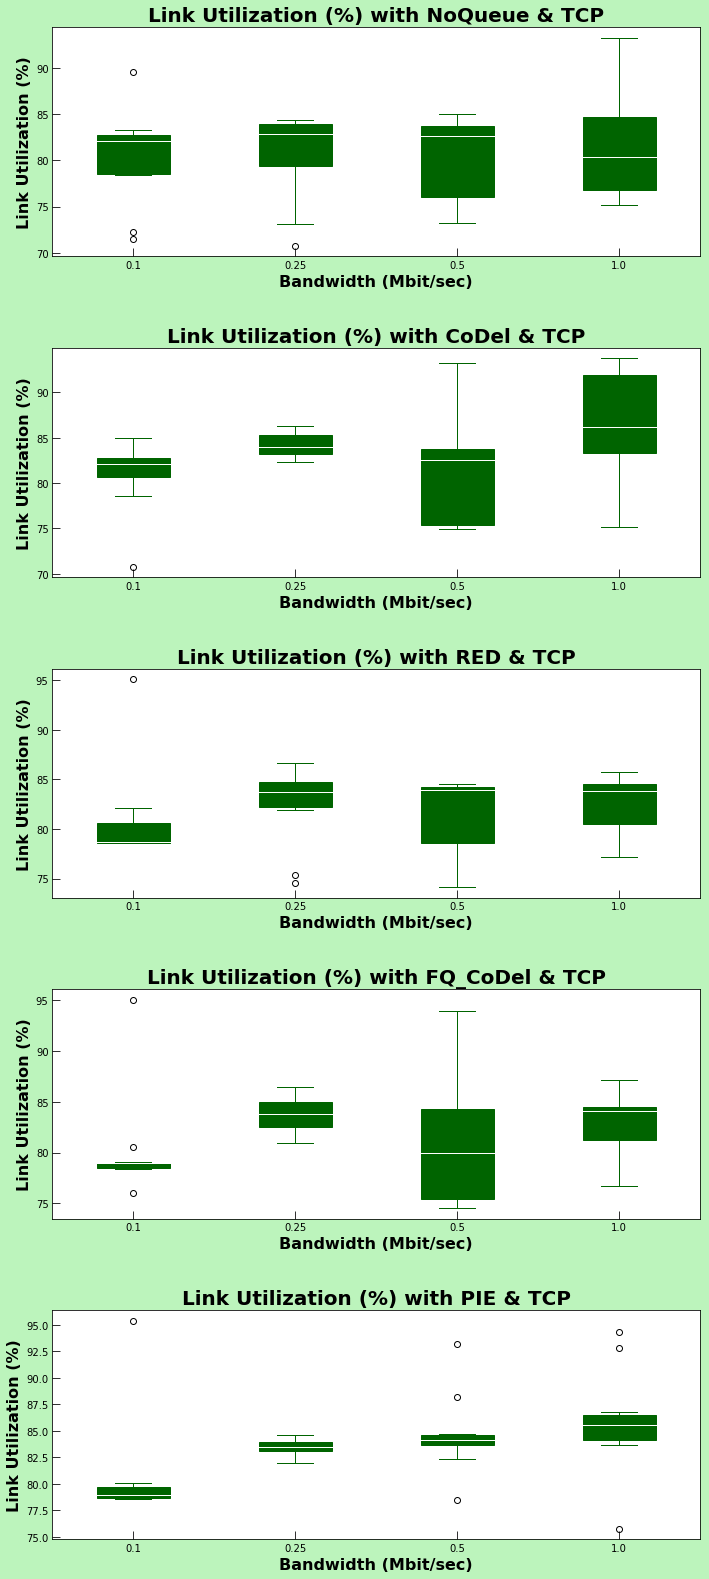

In [57]:
# Plot TCP-Linkutil data
plot_data(var_types[1], transport_types[0], all_data_tcp_linkutil)

# UDP Plots
These plots clearly show there's not enough variance in the data to notice the impacts of the different AQM implementations - this is why we're not having reviewers compare with these results.

In [51]:
# UDP Data
all_data_udp_delay = split_data(all_delay_data_noqueue_udp, all_delay_data_codel_udp,
                                     all_delay_data_red_udp, all_delay_data_fq_codel_udp,
                                     all_delay_data_pie_udp)

all_data_udp_linkutil = split_data(all_linkutil_data_noqueue_udp, all_linkutil_data_codel_udp,
                                     all_linkutil_data_red_udp, all_linkutil_data_fq_codel_udp,
                                     all_linkutil_data_pie_udp)

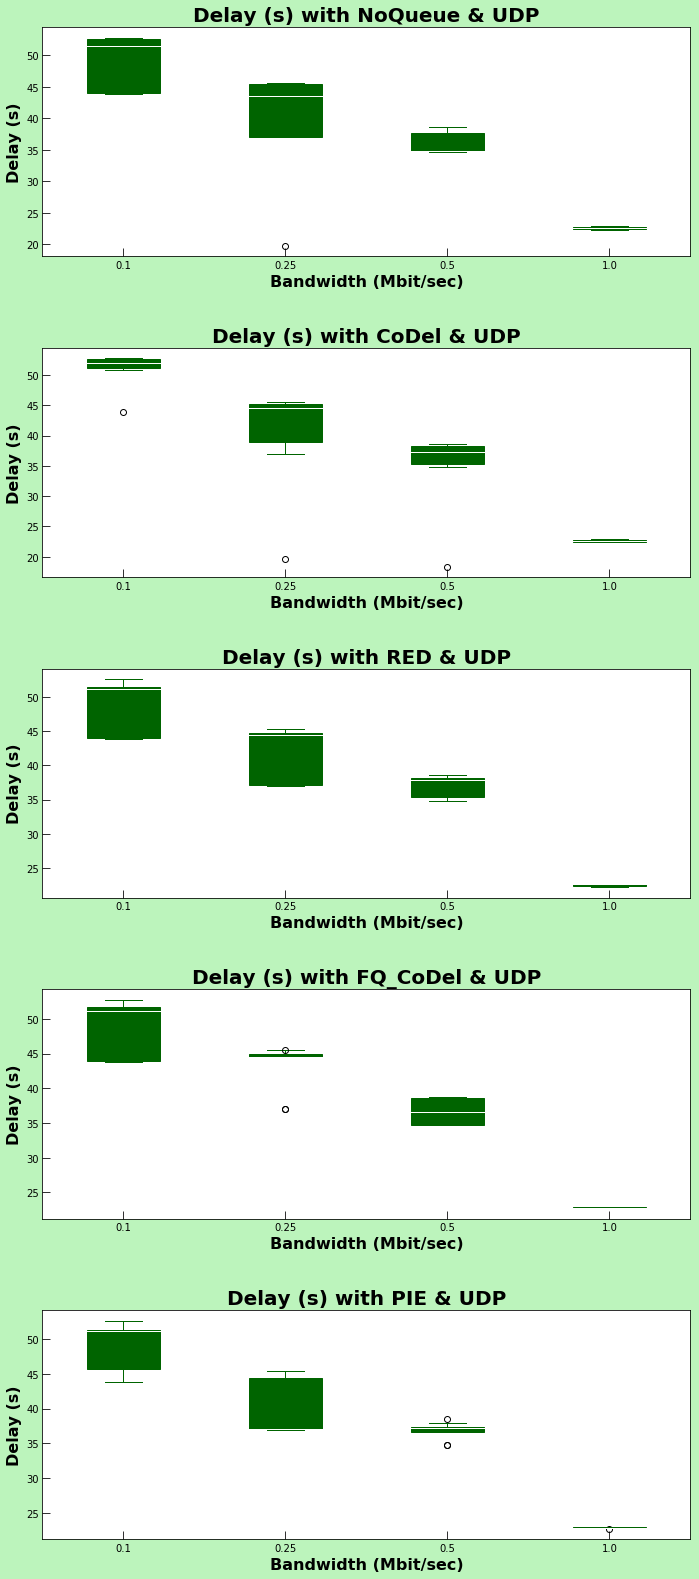

In [55]:
# Plot UDP-Delay data
plot_data(var_types[0], transport_types[1], all_data_udp_delay)

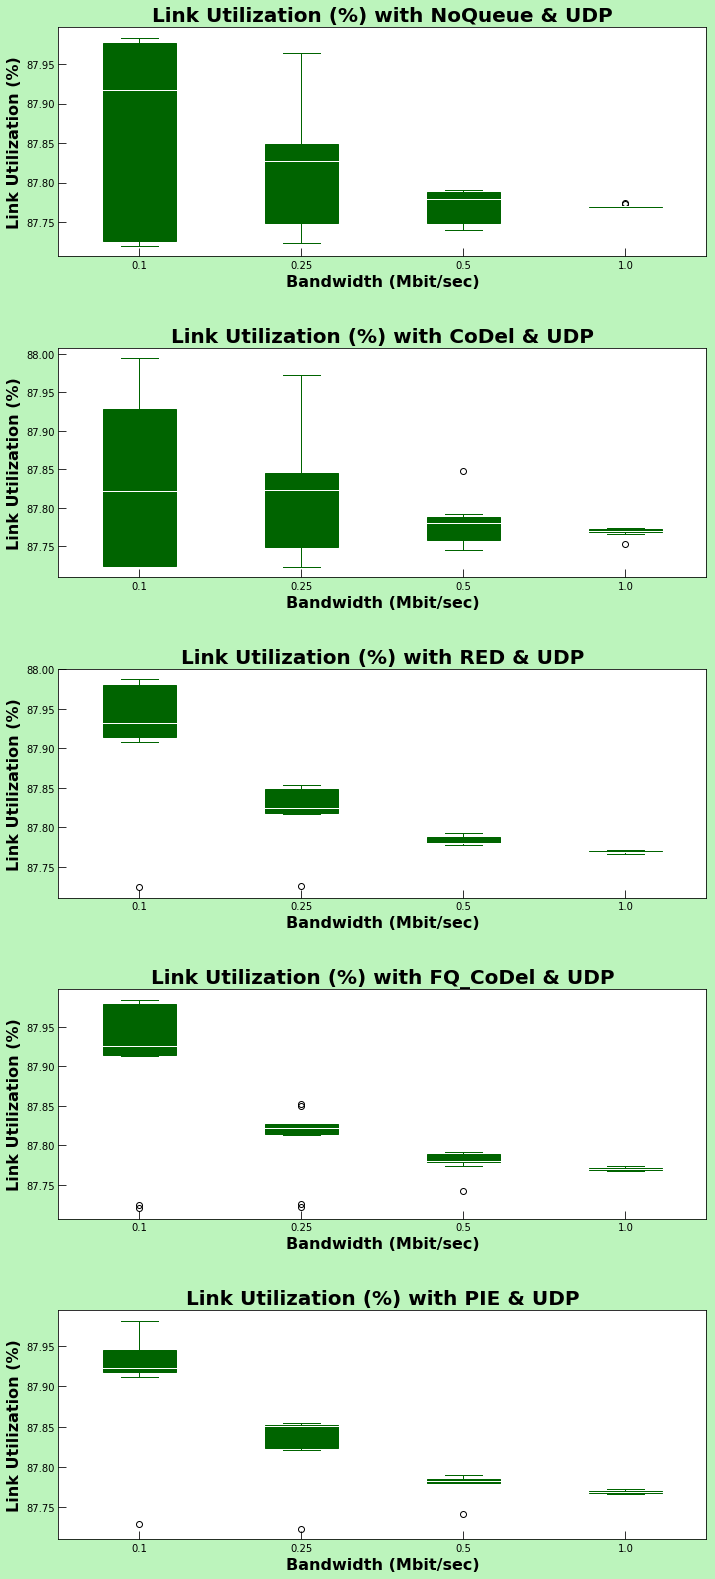

In [54]:
# Plot UDP-Linkutil data
plot_data(var_types[1], transport_types[1], all_data_udp_linkutil)